# PDF Power Hacks: Everything You Didn’t Know You Could Do with Python and Your PDF Files  
### 🛡️ DIY in AI: Protect your data. Don’t upload it anywhere.

# 🐍 Python | Scan Multiple Images into One PDF 🖼️➡️📄

## ❓Got a stack of scanned images you need to share as a single file? 🙃  
With Python, you can turn them into a polished PDF locally — no upload, no risk.

## 👉 Solution  
📸 Merge multiple image scans into a single PDF document.  
🛡️ 100% local — no data leaves your machine.  

## 🔧 How does it work?  
🧰 Use `PIL` to load and resize images.  
🧾 Use `reportlab` to create a PDF and add each image as a page.  
🗂️ Images are standardized and embedded in the final output.  

## 🔎 Why does it matter?  
📚 Makes archiving physical docs easy  
🔐 Maintains control over sensitive info  
💼 Looks professional when sharing with clients or for analysis  

## ✨ Real-world example:  
📁 You have image scans of notes, agreements or reports.  
📥 Combine them into a single, scrollable PDF — clean, fast and secure.  
🔬 Great prep step for NLP or OCR-based document AI systems!

📚 Scientific reference:  
🔗 [Kumar, Gaurav et al. “Document Image Classification, Indexing, and Retrieval Using Deep Features.” Computer Vision and Image Understanding (2020)](https://doi.org/10.1016/j.cviu.2020.103017)

## ⚙️ Business impact:  
🗃️ Streamlined document workflows  
📨 Better delivery experience  
📊 Ideal for structured document pipelines in AI projects  

## 📊 Code summary  
🖼️ Generates sample images using Python  
🧾 Adds them as pages in a new PDF  
📄 Outputs a single file ready for sharing or analysis  

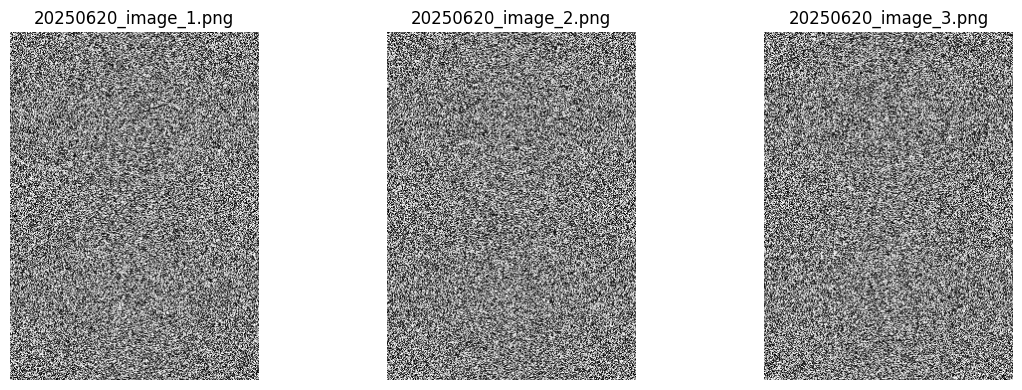

In [5]:
from PIL import Image
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
import matplotlib.pyplot as plt
import numpy as np
import os

# 📁 Configuration
prefix = "20250620_"
directory = f"{prefix}images"

# 📂 Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

# 🖼️ Generate and save 3 grayscale images into the directory
image_list = []
for i in range(3):
    # Create a random grayscale image (numpy array)
    img_array = np.random.randint(0, 255, (350, 250), dtype=np.uint8)
    img = Image.fromarray(img_array, mode='L')

    # Build filename with path
    filename = os.path.join(directory, f"{prefix}image_{i+1}.png")
    
    # Save image
    img.save(filename)
    image_list.append(filename)

# 📂 Get all PNG images with prefix from directory
image_list = sorted([
    os.path.join(directory, f)
    for f in os.listdir(directory)
    if f.startswith(prefix) and f.endswith(".png")
])

# 🛑 Check if no images found
if not image_list:
    raise FileNotFoundError(f"No PNG images with prefix '{prefix}' found in '{directory}'.")

# 🗂️ Create a PDF with the images
pdf_filename = f"{prefix}combined_output.pdf"
c = canvas.Canvas(pdf_filename, pagesize=A4)
width, height = A4

for image_path in image_list:
    img = Image.open(image_path)
    img.thumbnail((width, height))

    # Save temp version to extract dimensions
    temp_path = f"temp_{os.path.basename(image_path)}"
    img.save(temp_path)
    img_width, img_height = img.size
    x = (width - img_width) / 2
    y = (height - img_height) / 2
    c.drawImage(temp_path, x, y, width=img_width, height=img_height)
    c.showPage()
    os.remove(temp_path)

# 💾 Save final PDF
c.save()

# 📊 Optional: Preview all images
fig, axs = plt.subplots(1, len(image_list), figsize=(4 * len(image_list), 4))
if len(image_list) == 1:
    axs = [axs]

for ax, path in zip(axs, image_list):
    img = Image.open(path)
    ax.imshow(img, cmap='gray')
    ax.set_title(os.path.basename(path))
    ax.axis('off')

plt.tight_layout()
plt.show()
